In [2]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.fftpack as fftp
import pathlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import IPython


In [3]:
DATA = pathlib.Path('../../data').resolve()
f1 = DATA.joinpath('aow','sample.wav')
f1.exists()

True

In [2]:
f = pathlib.Path('.','slice.wav').resolve()

In [3]:
sr, sig = wav.read(str(f))
sig.shape

(30870, 2)

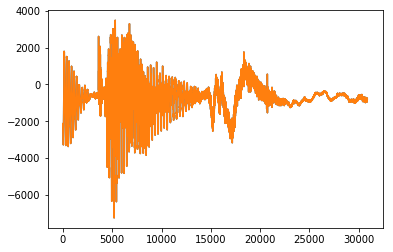

In [4]:
plt.plot(sig)
plt.show()

In [5]:
IPython.display.Audio("slice.wav")

In [63]:
wav.write('slice.wav', int(0.65*sr), sig[t1:t2])
IPython.display.Audio("slice.wav")

In [24]:
sr, sig = wav.read('slice.wav')

In [15]:
T = 1/sr
N = sig.shape[0]
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

In [19]:
# since there are two channels, we grab the first track
Y0 = sig.T[0]
# this is 8-bit track, b is now normalized on [-1,1)
Y1 = (Y0/(2**8.))*2 - 1
# calculate fourier transform (complex numbers list)
Yt = fftp.fft(Y1)
# you only need half of the fft list (real signal symmetry)
Fq = Yt[:(Yt.shape[-1] -1)]

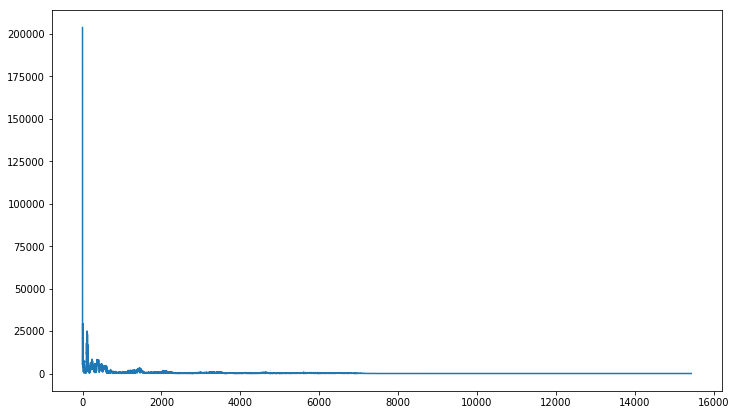

In [25]:
N = len(Yt)//2+1
f,a = plt.subplots(figsize=(12,7))
a.plot(np.abs(Yt[:N]))
plt.show()

In [ ]:

dt = t[1] - t[0]
fa = 1.0/dt # scan frequency
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Frequency)' % fa)

/home/stephen/.utils/pyenv/versions/3.7.2/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


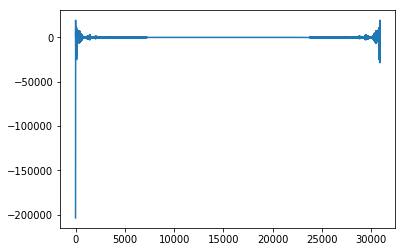

In [20]:
plt.plot(Fq)
plt.show()

In [ ]:
# FFT algorithm
yr = fftp.fft(vib_data)
# "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)])
# positive freqs only